#**Pronóstico de ventas para productos Agroindustriales**
### EDA para el dataset de productos agroindustriales

Maribel Medina Arboleda \
Manuel Alberto Peñafiel Mendoza \
Carlos Alberto Lenguerque Moreno \

El conjunto de datos con el que se desarrolló el proyecto es una base de datos otorgada por la empresa Energía y Potencia SAS, empresa comercializadora de productos para el agro a nivel nacional

Histórico de ventas de cada producto desde el año 2014
Variable respuesta: Ventas en unidades
Variables explicativas: Año y mes de ventas, Producto, Stock 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as ss

from pandas.plotting import scatter_matrix

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Explorando el dataset de Máquinas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Maquinas = pd.read_csv('Datosall.csv', encoding = "latin-1")

In [ ]:
# Tipo de Variables
Maquinas.info()

In [ ]:
# Pasamos la columna de Fecha a tipo fecha
Maquinas['Fecha'] = pd.to_datetime(Maquinas['Fecha'], format="%Y/%m/%d")

In [ ]:
Maquinas.head().append(Maquinas.tail())

,Fecha,Producto,Vendedor,Division,Subdivision,Ventas,Stock
0,2015-01-01,26799,74,DIVISION ENERGIA,GENERADORES DIESEL INDUSTRIALES,1,2
1,2015-01-01,26799,127,DIVISION ENERGIA,GENERADORES DIESEL INDUSTRIALES,1,2
2,2015-01-01,26802,74,DIVISION ENERGIA,GENERADORES DIESEL INDUSTRIALES,-1,9
3,2015-01-01,26802,94,DIVISION ENERGIA,GENERADORES DIESEL INDUSTRIALES,1,9
4,2015-01-01,5996,10,DIVISION FUMIGACION,FUMIGADORA GASOLINA,1,49
57010,2021-07-01,38930,96,DIVISION ENERGIAS ALTERNATIVAS,ACCESORIOS,1,2
57011,2021-07-01,37414,77,DIVISION BOMBAS,BOMBAS DIESEL DOMESTICAS,2,9
57012,2021-07-01,37414,121,DIVISION BOMBAS,BOMBAS DIESEL DOMESTICAS,1,9
57013,2021-07-01,39004,121,DIVISION ENERGIAS ALTERNATIVAS,CONTROLADORES,2,0
57014,2021-07-01,39033,9,DIVISION ENERGIA,ACCESORIOS INDUSTRIALES,1,0


In [ ]:
# Registros y variables contenidas en el dataset
Maquinas.shape

(57015, 7)

In [ ]:
# Resumen de las variables numéricas
Maquinas.describe()

,Producto,Vendedor,Ventas,Stock
count,57015.000000,57015.000000,57015.000000,57015.000000
mean,27580.383408,56.800930,4.661440,92.781075
std,7675.488555,37.836805,18.853445,234.713126
min,599.000000,1.000000,-120.000000,0.000000
25%,25288.000000,23.000000,1.000000,5.000000
50%,28708.000000,53.000000,2.000000,22.000000
75%,33257.000000,86.000000,3.000000,70.000000
max,39033.000000,138.000000,1899.000000,3296.000000


In [ ]:
# Número de referencias únicas (SKU) 

SKU= (Maquinas.groupby('Producto')['Fecha'].nunique())
pdSKU= pd.DataFrame(SKU)
pdSKU.sort_values('Fecha',ascending=False)

,Fecha
Producto,
37011,79
30171,79
37046,79
30198,79
33444,79
...,...
28102,1
28103,1
28105,1


In [ ]:
tabla = pdSKU[(pdSKU["Fecha"] >= 79)]
tabla

,Fecha
Producto,
6013,79
30171,79
30198,79
30338,79
33444,79
34932,79
37011,79
37046,79


array([[<AxesSubplot:title={'center':'Fecha'}>]], dtype=object)

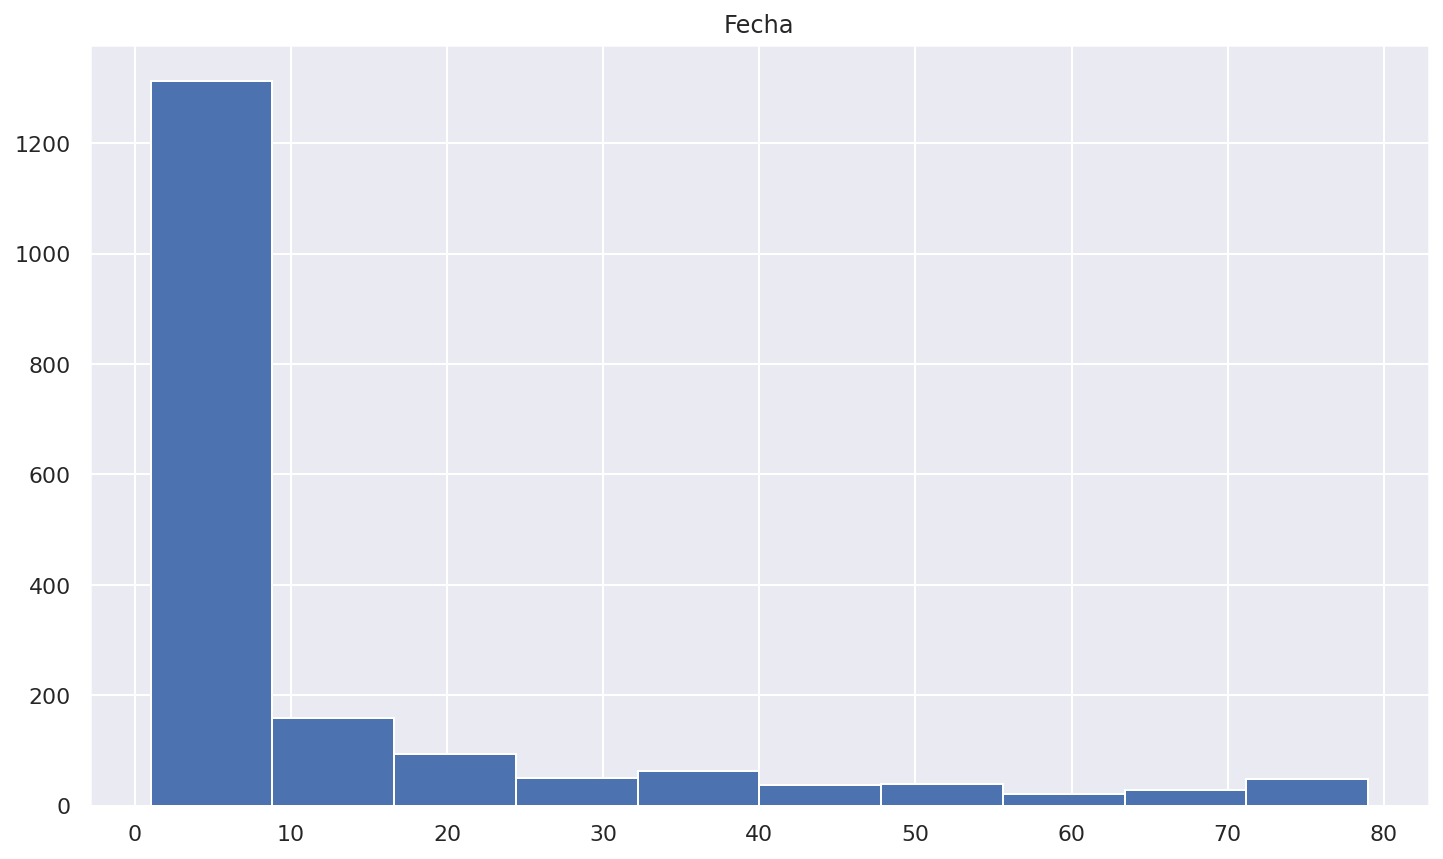

In [ ]:
# El dataset de Máquinas cuenta con información de stock y de ventas desde el año 2.015 a julio de 2021
# Evaluemos la cantidad de información y el número de SKUs (código único de producto) con los que vamos a trabajar con base en el número suficiente de observaciones:
pdSKU.hist()

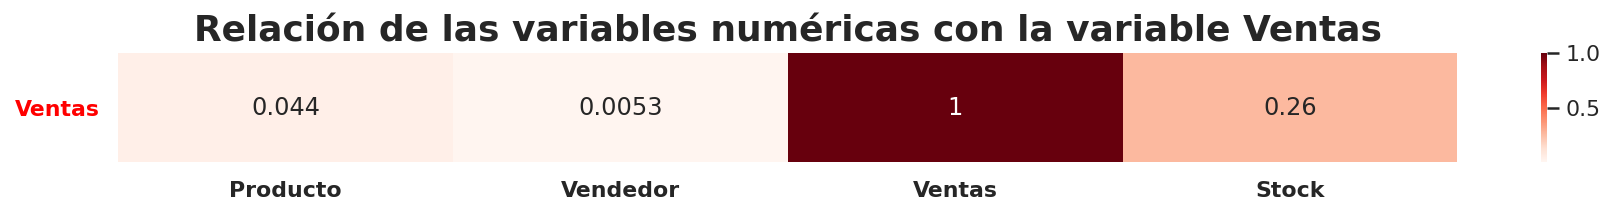

In [ ]:
# Relación del stock  con las Ventas

num = Maquinas.select_dtypes(exclude='object')

num_corr = num.corr()

#Plot the correlations

f, ax = plt.subplots(figsize=(15,1))

sns.heatmap(num_corr.sort_values(by=['Ventas'], ascending=False).head(1), cmap='Reds',annot_kws = {"size": 12},annot = True)
plt.title('Relación de las variables numéricas con la variable Ventas', weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='red', rotation=0)
plt.show()

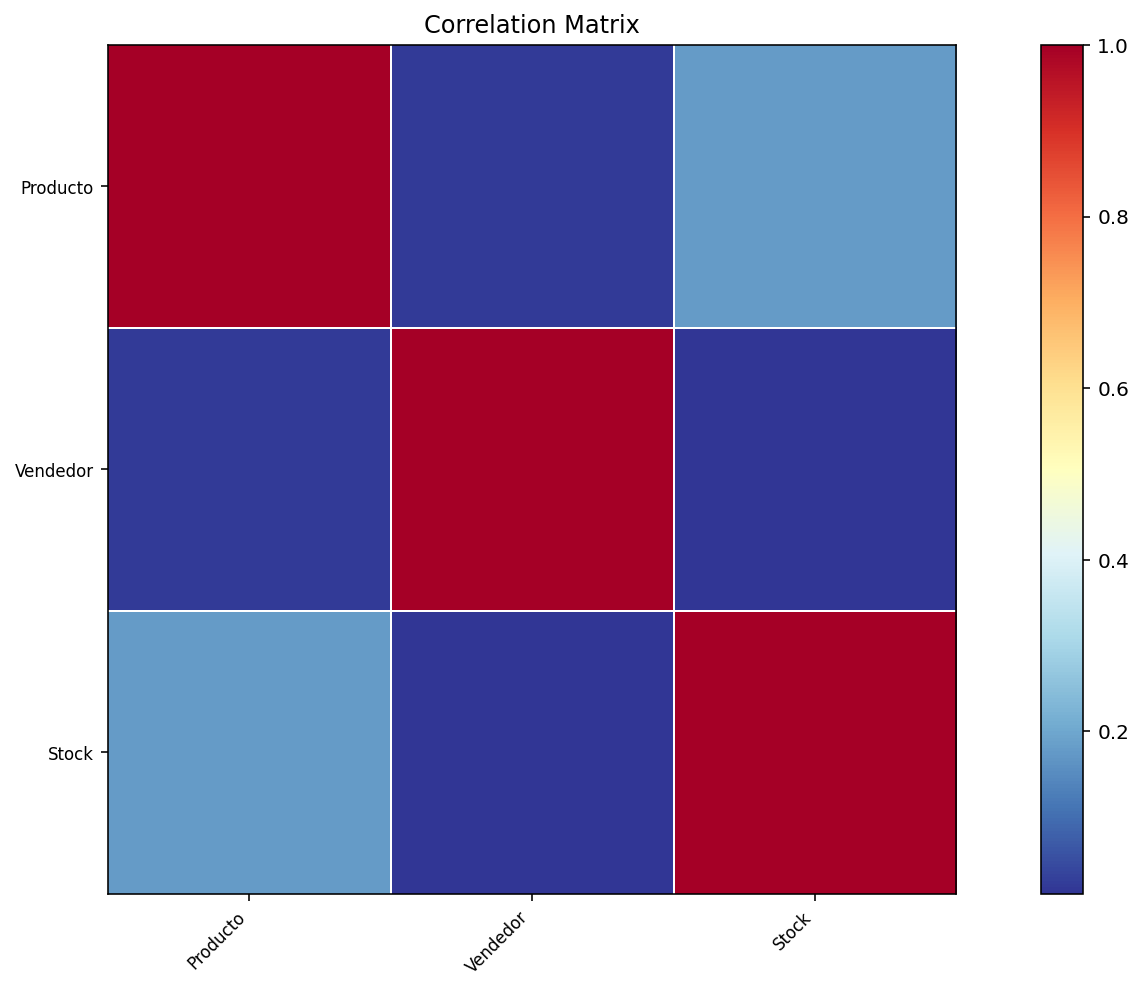

In [ ]:
corr = Maquinas.set_index('Ventas').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [ ]:
num_corr = Maquinas.corr()

num_corr

,Producto,Vendedor,Ventas,Stock
Producto,1.000000,0.019229,0.043929,0.179051
Vendedor,0.019229,1.000000,0.005286,0.010492
Ventas,0.043929,0.005286,1.000000,0.259475
Stock,0.179051,0.010492,0.259475,1.000000


In [ ]:
# Número de Vendedores únicos (sk_vendedor) 

VENDEDOR= (Maquinas.groupby('Vendedor')['Fecha'].nunique())
pdVENDEDOR= pd.DataFrame(VENDEDOR)
pdVENDEDOR.sort_values('Fecha',ascending=False)

,Fecha
Vendedor,
138,79
23,79
94,79
77,79
75,79
...,...
38,1
37,1
27,1


array([[<AxesSubplot:title={'center':'Fecha'}>]], dtype=object)

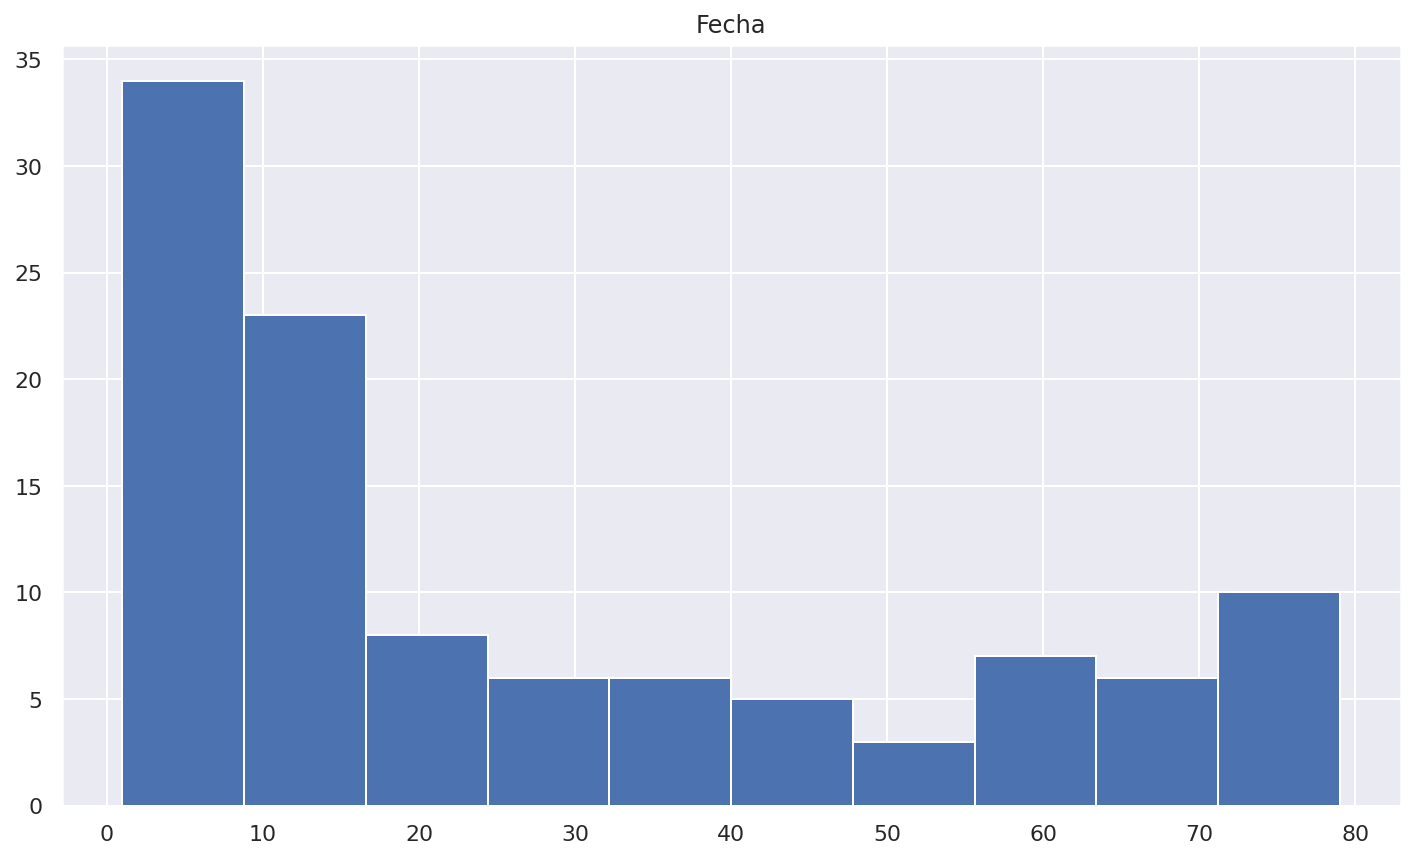

In [ ]:
pdVENDEDOR.hist()

<AxesSubplot:xlabel='Division', ylabel='count'>

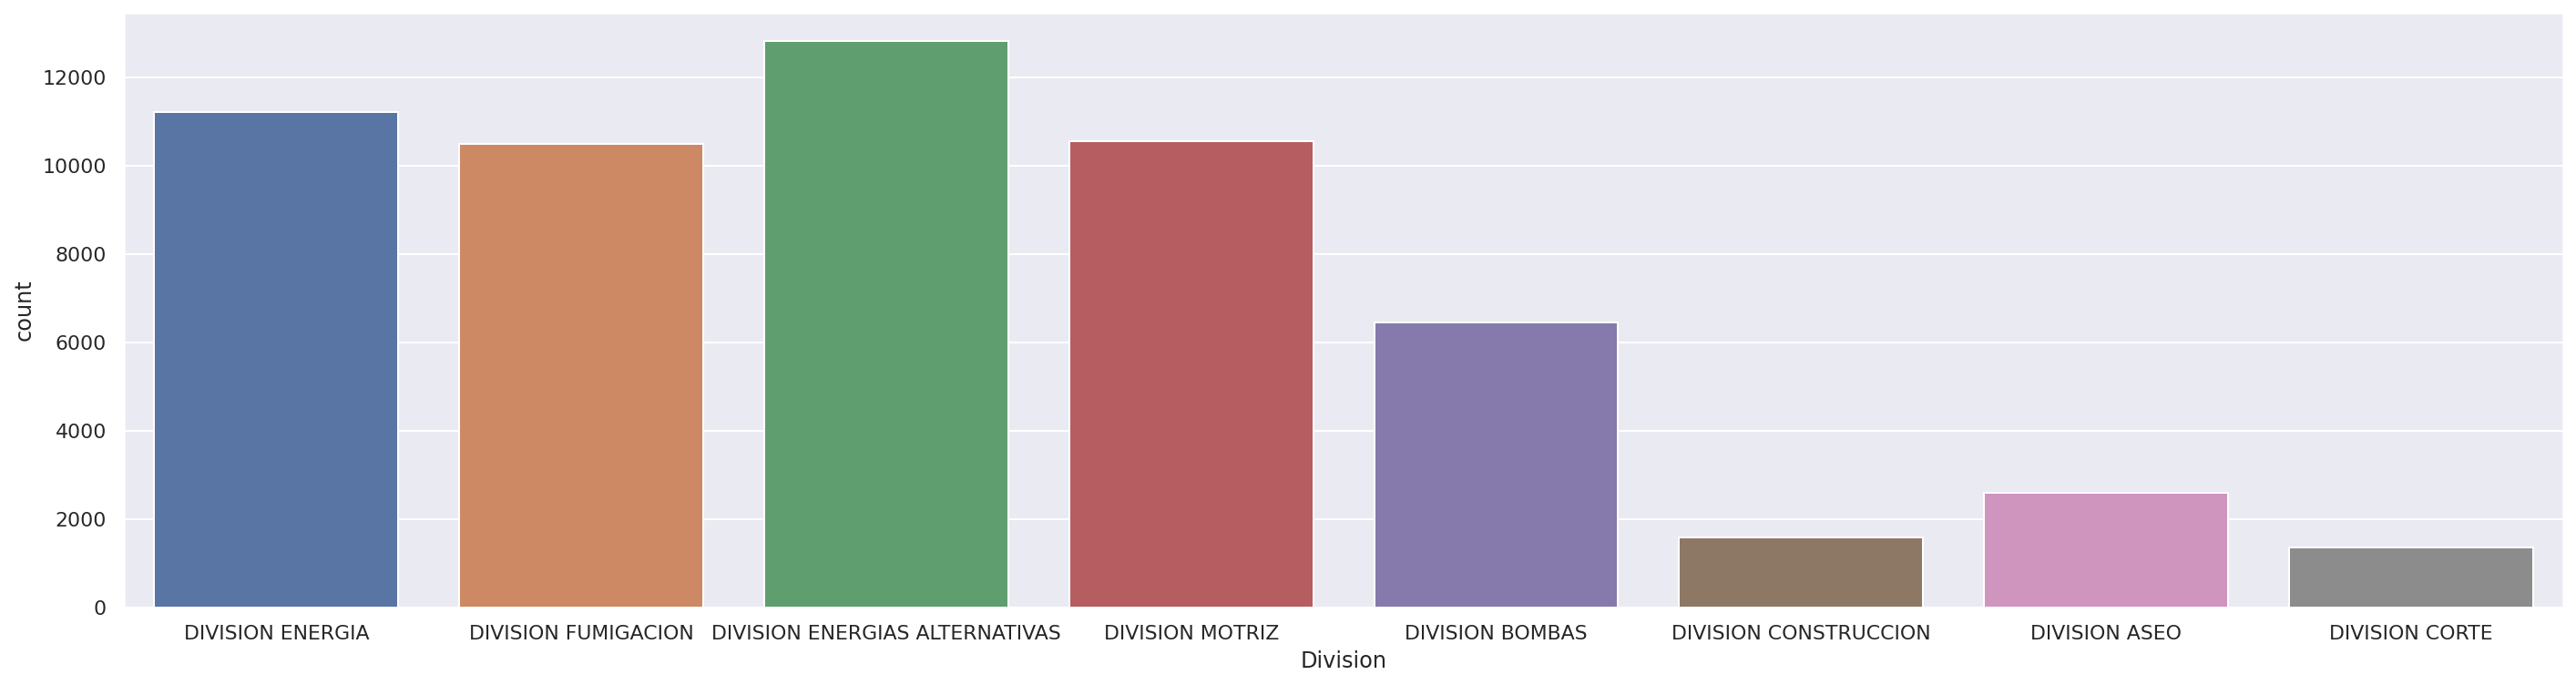

In [ ]:
# Número de datos por unidad de negocio
plt.figure(figsize=(24, 6))
sns.set(style="darkgrid",)
sns.countplot(x='Division', data=Maquinas)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/scipy/stats/_continuous_distns.py:4322: RuntimeWarning: divide by zero encountered in log
  trm = _norm_pdf(a + b * np.log(x + np.sqrt(x2+1)))
/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:1833: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Log Normal'}, xlabel='Ventas'>

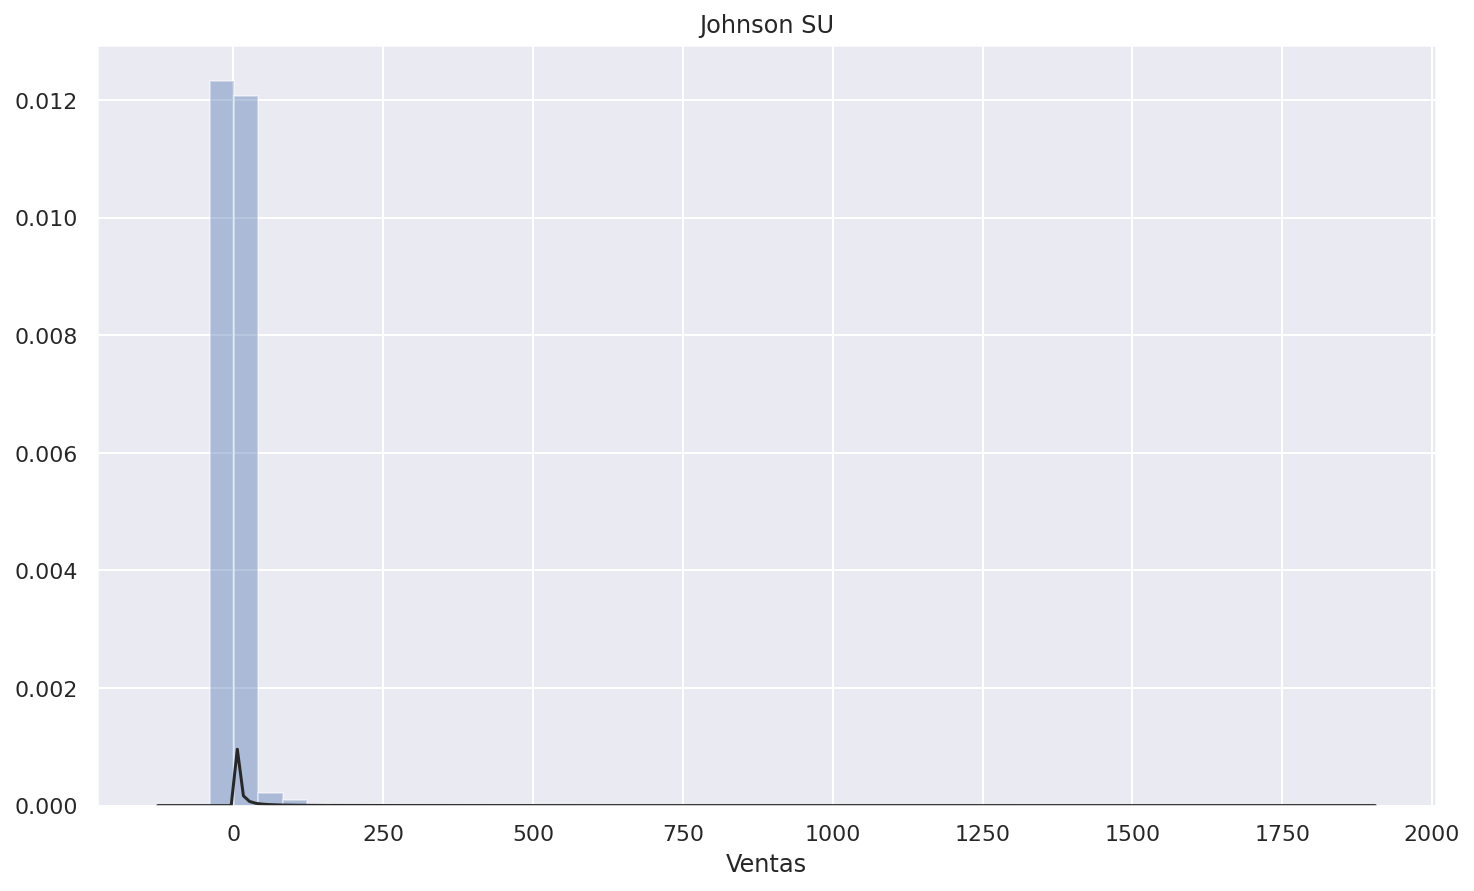

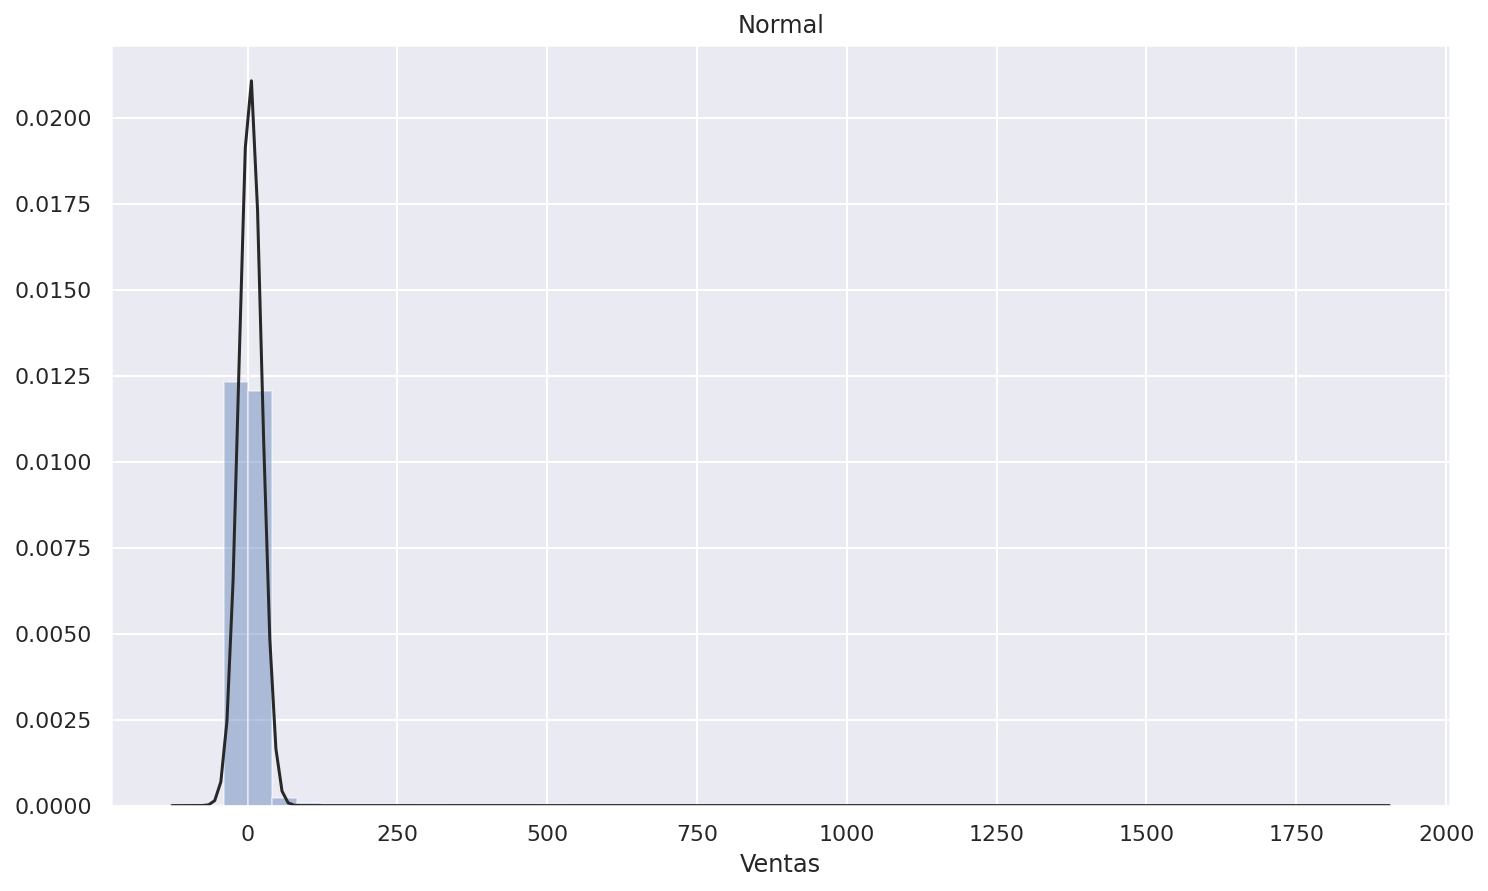

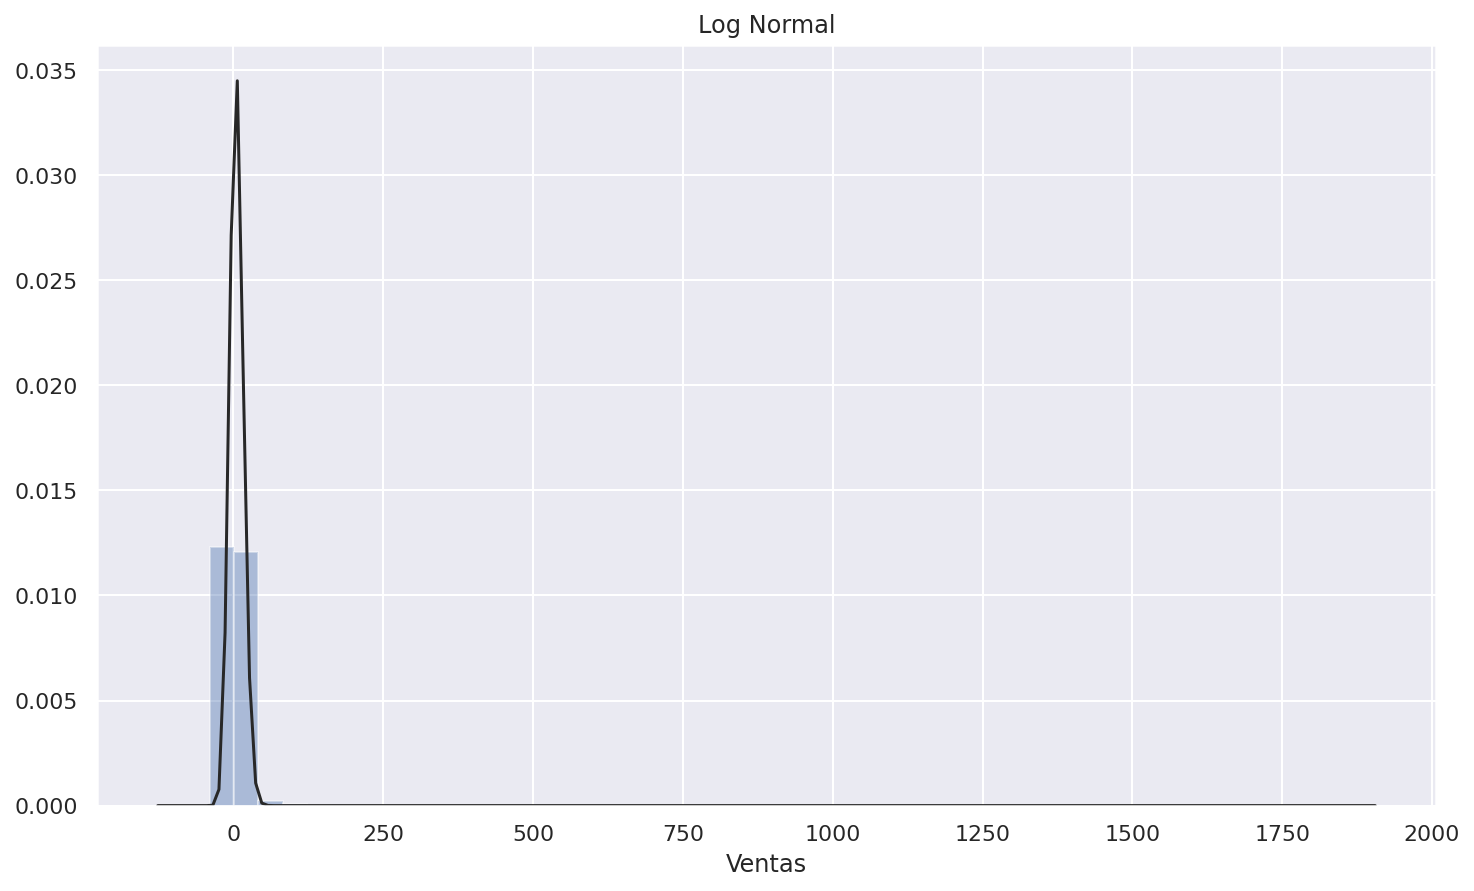

In [ ]:
# Distribucion de la variable respuesta

y = Maquinas['Ventas']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=ss.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=ss.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=ss.lognorm)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Asimetría: 35.801901
Curtosis: 2520.482158


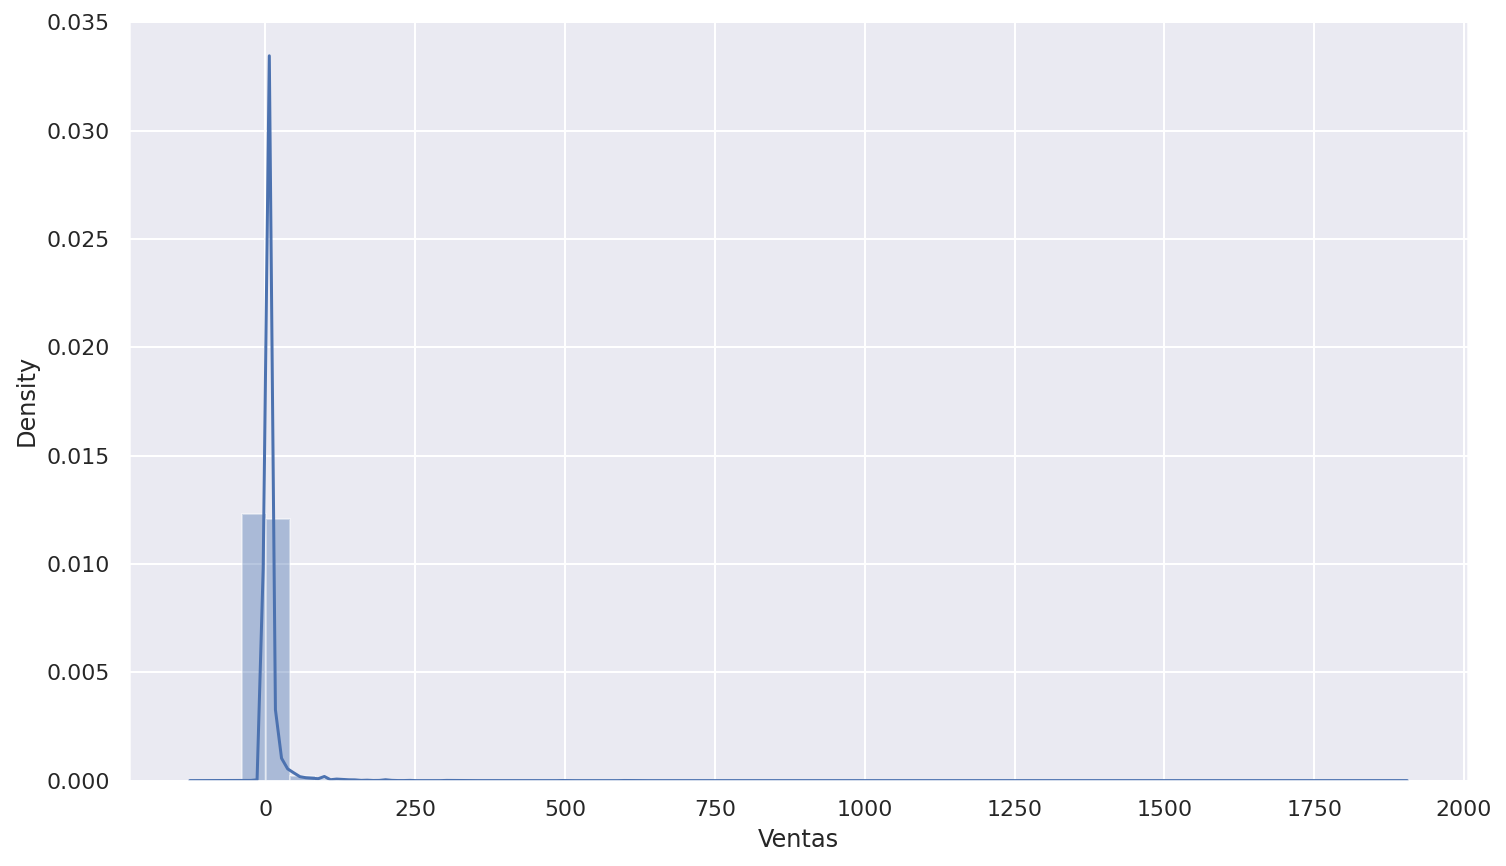

In [ ]:
sns.distplot(Maquinas['Ventas']);
print("Asimetría: %f" % Maquinas['Ventas'].skew())
print("Curtosis: %f" % Maquinas['Ventas'].kurt())